## Лінійна регресія з n змінними
$$h(x) = w_0 + w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n$$
**$x_1$, $x_2$, ... $x_n$** - _вхідні змінні_,<br>***$w_0$, $w_1$, ... $w_n$*** - _ваги, які потрібно знайти_<br>
Передбачення лінійної моделі в матричній формі запису - це перемноження терезів на ознаки плюс вільна вага.

$$y_{pred} = X\cdot w + w_0$$

Розмірність матриць $X$ і вектора $w$ повинні бути рівними. Тоді запишемо це через *скалярний добуток*.

$$y_{pred} = \langle X, w\rangle + w_0$$


Припустимо в нас є $X_0$ для вектора вагів який дорівнює 1.
$$y_{pred} = \langle X, w\rangle + I\cdot w_0$$
Тоді ми можемо переписати це у вигляді:
$$y_{pred}= h(\vec{x}) = \vec{x} \cdot \vec{w} = \langle X, w\rangle$$

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Cтворіть функцію для обчислення функції втрат у векторному вигляді;
$$ J(w_0​,w_1, ... ,w_m)=\frac{1}{2m} \sum_{i=1}^{m}​(h(x^{(i)})−y^{(i)})^2  $$

Реалізуйте один крок градієнтного спуску
$$  
\nabla J(\vec{w}) =
\begin{pmatrix}
\frac{\partial J(\vec{w})}{\partial w_0} \\
\frac{\partial J(\vec{w})}{\partial w_1} \\
\frac{\partial J(\vec{w})}{\partial w_2} \\
.. \\
\frac{\partial J(\vec{w})}{\partial w_n} \\
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})\\
\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})x_1^{(i)} \\
\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})x_2^{(i)} \\
.. \\
\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})x_n^{(i)} \\
\end{pmatrix}
$$

$$
\vec{w}
=\vec{w}^{prev} − α \nabla J(\vec{w})
$$
$α$ - коефіцієнт навчання (leatning rate)

$$
X_{m,n}=
\begin{bmatrix}
 1&  x^{(1)}_{1}&  x^{(1)}_{2}&  …&  x^{(1)}_{n}  \\
 1&  x^{(2)}_{1}&  x^{(2)}_{2}&  …&  x^{(2)}_{n}  \\
 1&  x^{(3)}_{1}&  x^{(3)}_{2}&  …&  x^{(3)}_{n}  \\
 \vdots&   \vdots&   \vdots&   \ddots&  \vdots&   \\
 1&  x^{(m)}_{1}&  x^{(m)}_{2}&  …&  x^{(m)}_{n}  \\
\end{bmatrix}​​
$$

$$
∇J(\vec{w})=\frac{1}{m}​  X^T(X \vec{w} - \vec{y}​)
$$

Початковий вектор $\vec{w}$ та додаємо стовпчик з коефіцієнтом 1 до матрці X

In [265]:
def weights_X(X):
    X_1 = np.ones(X.shape[0])
    X = np.insert(X, 0, X_1, axis=1)
    weights = np.zeros(X.shape[1])
    return weights, X

In [266]:
def linear_regression(X, y, weights, learning_rate=0.01, num_iter=1000, epsilon=1e-10):

    m, n = X.shape
    loss_history = []
    y = y.to_numpy()

    for epoch in range(num_iter):
      # Функція гіпотези лінійної регресії у векторному вигляді
      y_pred = X.dot(weights)
      # функції втрат у векторному вигляді
      loss = np.sum((y_pred - y) ** 2) / (m)
      loss_history.append(loss)
      # Градієнтний спуск
      gradient = 2/m * X.T.dot(y_pred - y)
      weights -= learning_rate * gradient

      if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}/{num_iter}, mse: {loss}')
      if loss < epsilon:
        print(f'Converged. Epoch {epoch + 1}, Final MSE: {loss}')
        break
    return weights, loss_history

Normalization

In [290]:
def normalize_features(X):
    mean_values = np.mean(X, axis=0)
    std_values = np.std(X, axis=0)
    X_normalized = (X - mean_values) / std_values
    return X_normalized


Знайдіть найкращі параметри для датасету 'data/Housing.csv' прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


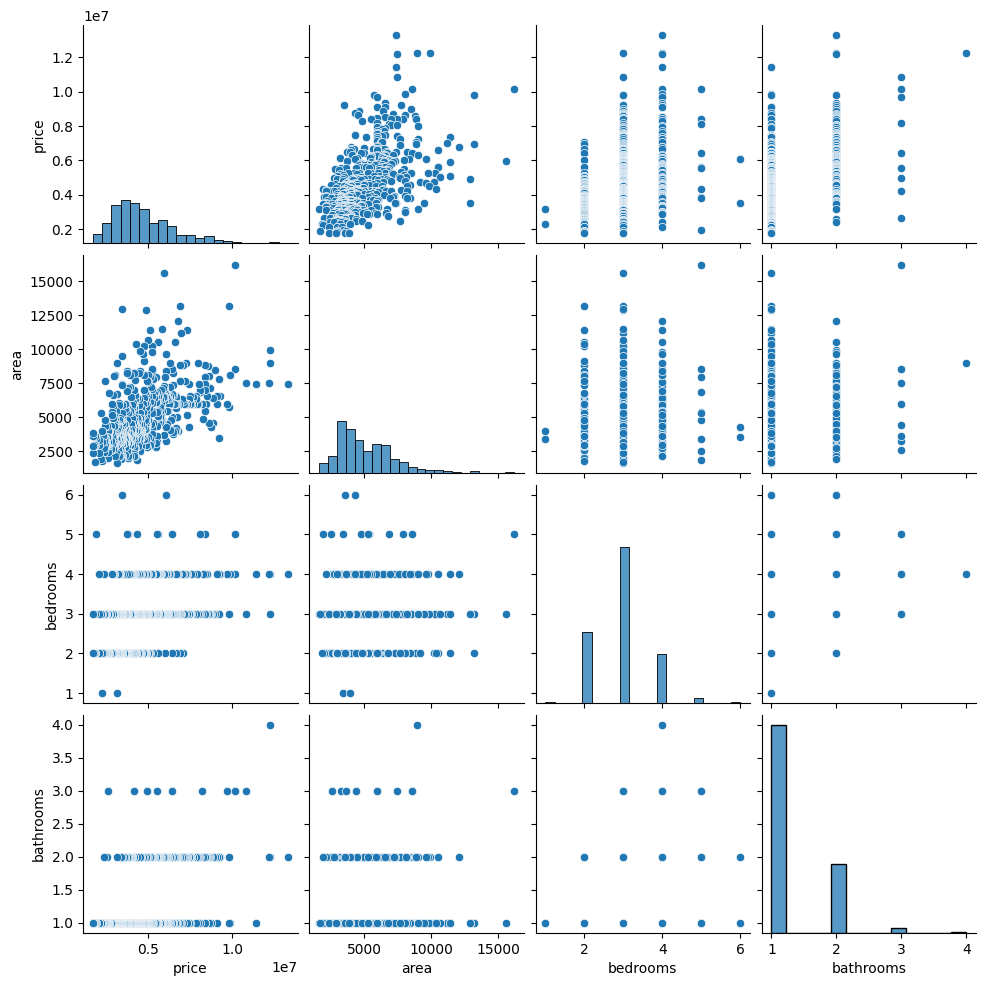

<Axes: >

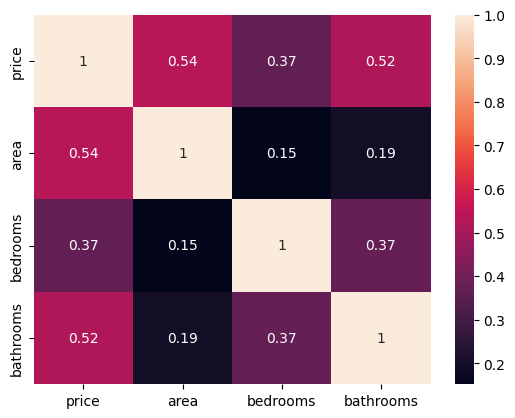

In [268]:
# Import data
df = pd.read_csv('data/Housing.csv')
display(df.info())
display(df.head())

# Analyzing data
features_to_analyse = ['price', 'area', 'bedrooms', 'bathrooms']
sns.pairplot(df,
             vars = features_to_analyse)
plt.show()
df_corr = df[features_to_analyse].corr()
sns.heatmap(df_corr, annot = True)

Розрахуємо коеффіцієнти

In [291]:
X_multi = df[['area', 'bathrooms', 'bedrooms']]
y_multi = df['price']
X_norm = normalize_features(X_multi)
weights, X_norm = weights_X(X_norm)
y_norm = normalize_features(y_multi)
weights, loss_history_multi = linear_regression(X_norm, y_norm, weights, learning_rate=0.1, epsilon=1e-10, num_iter=1000)

Epoch 100/1000, mse: 0.5129169332941544
Epoch 200/1000, mse: 0.5129169332941237
Epoch 300/1000, mse: 0.5129169332941236
Epoch 400/1000, mse: 0.5129169332941236
Epoch 500/1000, mse: 0.5129169332941236
Epoch 600/1000, mse: 0.5129169332941236
Epoch 700/1000, mse: 0.5129169332941236
Epoch 800/1000, mse: 0.5129169332941236
Epoch 900/1000, mse: 0.5129169332941236
Epoch 1000/1000, mse: 0.5129169332941236


In [292]:
print(f'-----Ітогове рівняння-----')
print(f'y = {weights[0]} + {weights[1]} * area + {weights[2]} * bath + {weights[3]} * bed')

-----Ітогове рівняння-----
y = 3.0491409601080703e-16 + 0.4394520852064684 * area + 0.3723444227527319 * bath + 0.1605286597689976 * bed


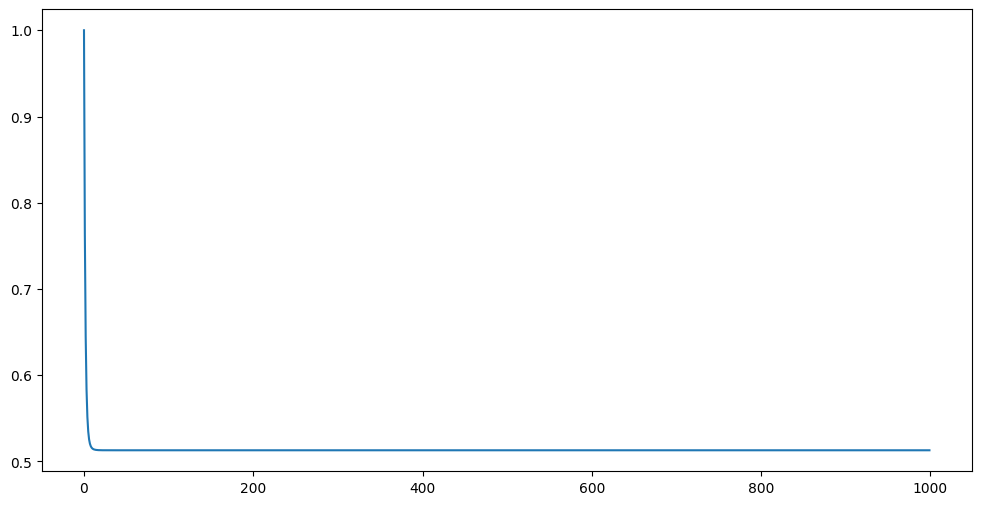

In [271]:
plt.figure(figsize = (12,6))
plt.plot(loss_history_multi)

Пробуємо донавчання

In [272]:
weights, loss_history_ext = linear_regression(X_norm, y_norm, weights, learning_rate=0.1, epsilon=1e-10, num_iter=1000)
print(f'-----Ітогове рівняння-----')
print(f'y = {weights[0]} + {weights[1]} * area + {weights[2]} * bath + {weights[3]} * bed')

Epoch 100/1000, mse: 0.5129169332941236
Epoch 200/1000, mse: 0.5129169332941236
Epoch 300/1000, mse: 0.5129169332941236
Epoch 400/1000, mse: 0.5129169332941236
Epoch 500/1000, mse: 0.5129169332941236
Epoch 600/1000, mse: 0.5129169332941236
Epoch 700/1000, mse: 0.5129169332941236
Epoch 800/1000, mse: 0.5129169332941236
Epoch 900/1000, mse: 0.5129169332941236
Epoch 1000/1000, mse: 0.5129169332941236
-----Ітогове рівняння-----
y = 3.0760307654750513e-16 + 0.4394520852064684 * area + 0.3723444227527319 * bath + 0.1605286597689976 * bed


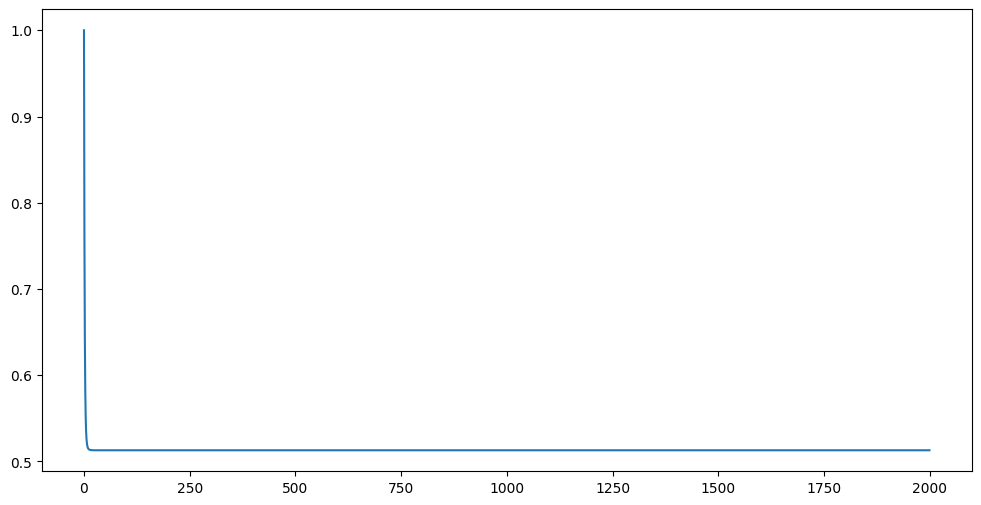

In [273]:
history = loss_history_multi + loss_history_ext
plt.figure(figsize = (12,6))
plt.plot(history)

## Scikit-learn realization

Розрахуємо коеффіцієнти за допомогою моделі LinearRegression

In [306]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

norm = pd.DataFrame()
norm['price'] = normalize_features(df.price)
norm['area'] = normalize_features(df.area)
norm['bathrooms'] = normalize_features(df.bathrooms)
norm['bedrooms'] = normalize_features(df.bedrooms)
norm.head()

X_a = np.array([norm.area, norm.bathrooms, norm.bedrooms]).T
y_a = np.array([norm.price]).T

# Split the targets into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size=0.2, random_state=0)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Розрахуємо коеффіцієнти моделі

In [307]:
y_pred = model.predict(X_test)
print(f'Коефіціенти моделі: {model.coef_}')
print(f'Незалежний параметр в моделі: {model.intercept_}')
print(f'-----Ітогове рівняння-----')
print(f'y = {model.intercept_[0]} + {model.coef_[0][0]} * area + {model.coef_[0][1]} * bath + {model.coef_[0][2]} * bed')

Коефіціенти моделі: [[0.45411418 0.38019143 0.18726083]]
Незалежний параметр в моделі: [0.01152618]
-----Ітогове рівняння-----
y = 0.011526181547499459 + 0.45411418116445484 * area + 0.38019143498939023 * bath + 0.1872608333299246 * bed


Розрахуємо MSE та коеффіцієнт детермінації

In [308]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.43
Coefficient of determination: 0.48


Розрахуємо коеффіцієнти за допомогою моделі SGDRegression (Stochastic Gradient Descent)

In [309]:
model_SGDLR = linear_model.SGDRegressor(loss = 'squared_error',
                                        penalty ='l2',
                                        max_iter = 1000,
                                        tol = 1e-10,
                                        learning_rate = 'adaptive',
                                        eta0 = 0.1
                                        )
model_SGDLR.fit(X_train, y_train.ravel())

SGDRegressor(eta0=0.1, learning_rate='adaptive', tol=1e-10)

In [310]:
model_SGDLR.predict(X_test)
print(f'Коефіціенти моделі: {model_SGDLR.coef_}')
print(f'Незалежний параметр в моделі: {model_SGDLR.intercept_}')
print(f'-----Ітогове рівняння-----')
print(f'y = {model_SGDLR.intercept_[0]} + {model_SGDLR.coef_[0]} * area + {model_SGDLR.coef_[1]} * bath + {model_SGDLR.coef_[2]} * bed')

Коефіціенти моделі: [0.45389422 0.37931446 0.18806737]
Незалежний параметр в моделі: [0.01148734]
-----Ітогове рівняння-----
y = 0.011487344578392972 + 0.45389421613290004 * area + 0.37931445536604347 * bath + 0.18806736924191847 * bed


Порівняємо рівняння

In [311]:
print('За допомогою власної функціі LinearRegression:')
print(f'y = {weights[0]} + {weights[1]} * area + {weights[2]} * bath + {weights[3]} * bed\n')
print('За допомогою моделі LinearRegression:')
print(f'y = {model.intercept_[0]} + {model.coef_[0][0]} * area + {model.coef_[0][1]} * bath + {model.coef_[0][2]} * bed\n')
print('За допомогою моделі SGDRegression:')
print(f'y = {model_SGDLR.intercept_[0]} + {model_SGDLR.coef_[0]} * area + {model_SGDLR.coef_[1]} * bath + {model_SGDLR.coef_[2]} * bed\n')

За допомогою власної функціі LinearRegression:
y = 3.0491409601080703e-16 + 0.4394520852064684 * area + 0.3723444227527319 * bath + 0.1605286597689976 * bed

За допомогою моделі LinearRegression:
y = 0.011526181547499459 + 0.45411418116445484 * area + 0.38019143498939023 * bath + 0.1872608333299246 * bed

За допомогою моделі SGDRegression:
y = 0.011487344578392972 + 0.45389421613290004 * area + 0.37931445536604347 * bath + 0.18806736924191847 * bed

